In [1]:
import pydra

### Introduction to Tasks with States

Task might be run for a single set of input values or we can generate multiple sets, that will be called "states". In order to create `Task` wit a `State` we have to provide input that is iterable and specify the way how we want to map values of the inputs to the specific states. In order to do it, we use the `split` method and specify `splitter`, for a function with one input, the `splitter` is trivial:

In [3]:
@pydra.to_task
def add_two(x):
    return x + 2

task1 = add_two(name="add_two", x=[1, 2, 3]).split(splitter="x")
task1(plugin="cf")

We can now check the results of our task:

In [3]:
task1.result()

[Result(output=Output(out=3), runtime=None, errored=False),
 Result(output=Output(out=4), runtime=None, errored=False)]

As we could expect, the result now contains three elements, one for each value of `State`, i.e. for each value of `x` in this exampel.

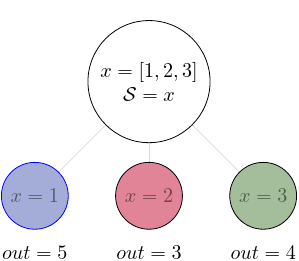

Now, we can try to run function with multiple inputs:

In [4]:
@pydra.to_task
def add_var(a, b):
    return a + b

Now we have more options to use splitter, it depends on the input and on our application. We could have `a` that is a single value and `b` that is a list:

In [5]:
task2 = add_var(name="addvar1", a=100, b=[1, 2, 3]).split(splitter="b")
task2(plugin="cf")
task2.result()

[Result(output=Output(out=101), runtime=None, errored=False),
 Result(output=Output(out=102), runtime=None, errored=False)]

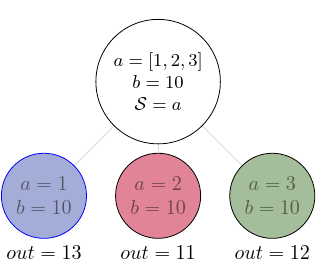

As in the previous example, our result contains two elements.

Now we can imagine that both, `a` and `b` are a two elements lists.

In [6]:
task3 = add_var(name="addvar1", a=[10, 100], b=[1, 2, 3])

Now, we have two options to map the values, we might want to run the task for two sets of values: (`a`=10, `b`=1) and (`a`=100, `b`=2), or we might want to run the task for four sets: (`a`=10, `b`=1), (`a`=10, `b`=2), (`a`=100, `b`=1) and (`a`=100, `b`=2). 

The first situation will be represented by "scalar" splitter, the later by the "outer" splitter. 

Let's start from the scalar splitter, that uses parentheses in syntax:

In [7]:
task3.split(splitter=("a", "b"))
task3(plugin="cf")
task3.result()

[Result(output=Output(out=11), runtime=None, errored=False),
 Result(output=Output(out=102), runtime=None, errored=False)]

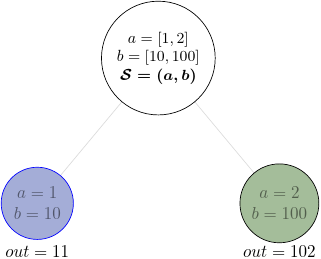

As we expected, we have `10+1=11` and `100+2=102`. 

For the outer splitter we will use brackets:

In [8]:
task4 = add_var(name="addvar1", a=[10, 100], b=[1, 2])
task4.split(splitter=["a", "b"])
task4(plugin="cf")
task4.result()

[Result(output=Output(out=11), runtime=None, errored=False),
 Result(output=Output(out=12), runtime=None, errored=False),
 Result(output=Output(out=101), runtime=None, errored=False),
 Result(output=Output(out=102), runtime=None, errored=False)]

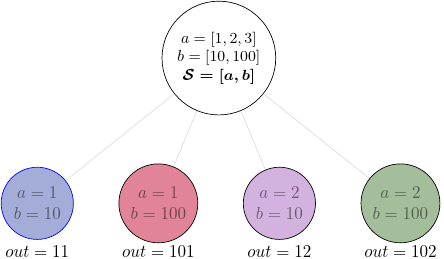

Now, we have results for all of the combination of values of `a` and `b`.

For more inputs we can create more complex splitter by using scalar and outer products. Note, that the scalar splitter can only work for lists that have the same length, but the outer splitter doesn't have this limitation. Let's run one more example:

In [9]:
@pydra.to_task
def add_vector(x1, y1, x2, y2):
    return (x1 + x2, y1 + y2)

task5 = add_vector(name="add_vect", output_names=["x", "y"], 
                   x1=[10, 20], y1=[1, 2], x2=[10, 20, 30], y2=[10, 20, 30])
task5.split(splitter=[("x1", "y1"), ("x2", "y2")])
task5(plugin="cf")
task5.result()

[Result(output=Output(out=(20, 11)), runtime=None, errored=False),
 Result(output=Output(out=(30, 21)), runtime=None, errored=False),
 Result(output=Output(out=(40, 31)), runtime=None, errored=False),
 Result(output=Output(out=(30, 12)), runtime=None, errored=False),
 Result(output=Output(out=(40, 22)), runtime=None, errored=False),
 Result(output=Output(out=(50, 32)), runtime=None, errored=False)]

#### combining the output

We could also combine specific outputs after using the `split` method. In order to do it, we can use `combine` method.

Let's say we want to calculate squares and cubes of integers and combine separately all squares and all cubes: 

In [10]:
@pydra.to_task
def power(x, n):
    return x**n

task6 = power(name="power", x=[1, 2, 3, 4], n=[2, 3]).split(splitter=["x", "n"]).combine("x")
task6(plugin="cf")
task6.result()

[[Result(output=Output(out=1), runtime=None, errored=False),
  Result(output=Output(out=4), runtime=None, errored=False),
  Result(output=Output(out=9), runtime=None, errored=False),
  Result(output=Output(out=16), runtime=None, errored=False)],
 [Result(output=Output(out=1), runtime=None, errored=False),
  Result(output=Output(out=8), runtime=None, errored=False),
  Result(output=Output(out=27), runtime=None, errored=False),
  Result(output=Output(out=64), runtime=None, errored=False)]]

Now, our result contains two list, the first one is for squares, the second for cubes.

In [11]:
squares_list = [el.output.out for el in task6.result()[0]]
cubes_list = [el.output.out for el in task6.result()[1]]
print(f"squares: {squares_list}")
print(f"cubes: {cubes_list}")

squares: [1, 4, 9, 16]
cubes: [1, 8, 27, 64]


In [12]:
task6.output_dir

[PosixPath('/var/folders/32/823z586933zbm26chcmcqq1m0000gp/T/tmpkulv1csy/FunctionTask_2d196a2b527ae6ae7784a61ba0cbe0591d1f176caed581e934a81cf7d379ddb8'),
 PosixPath('/var/folders/32/823z586933zbm26chcmcqq1m0000gp/T/tmpkulv1csy/FunctionTask_1b9399c3a44893deb1ab8b1a9a23f8cb09037d365e26d49271205a255c19ae81'),
 PosixPath('/var/folders/32/823z586933zbm26chcmcqq1m0000gp/T/tmpkulv1csy/FunctionTask_766fdc149ef21b49eff19fd8e01bc61b7f136fa530f9260f37a78f7dd194b4ff'),
 PosixPath('/var/folders/32/823z586933zbm26chcmcqq1m0000gp/T/tmpkulv1csy/FunctionTask_52221c98b54e70c3057a002df24160072812242df06e29942c47eb081246ab10'),
 PosixPath('/var/folders/32/823z586933zbm26chcmcqq1m0000gp/T/tmpkulv1csy/FunctionTask_34d08ffcc9632d00d3502e33eb684d10b719cc63cc353fd6f3ed450e997d7c06'),
 PosixPath('/var/folders/32/823z586933zbm26chcmcqq1m0000gp/T/tmpkulv1csy/FunctionTask_8c6a96e7b7d9df50f19ff65ff21102a6e38547cf3d5ebdbfea0801da5e6c063d'),
 PosixPath('/var/folders/32/823z586933zbm26chcmcqq1m0000gp/T/tmpkulv1csy/Fun

TODO dimensions, multiple-steps comb

**TODO: update splitter**
### Executing tasks

As we mentioned before, `Task` is a callable object, so we can run the task using `__call__` method, but this is not the online way of calling the task. We can use `Submitter` class with a specific plugin to execute the task. Submitter will be explained later, but here is an example of running the task using `ConcurrentFutures`.

In order to use `ConcurrentFutures` in Jupyter notebook, we need to use nest_asyncio and set an additional environmental variable


Now we can create submitter and run the task using the submitter. TODO:later


task4 = add_var(name="a_plus_b")
task4.inputs.a = 4
task4.inputs.b = 5

with pydra.Submitter(plugin="cf") as sub:
    sub(task4)
task4.result()


`Task.__call__` method can also use the submitter if we pass it as an argument:


task5 = add_var(name="a_plus_b")
task5.inputs.a = 4
task5.inputs.b = 5

with pydra.Submitter(plugin="cf") as sub:
    task5(submitter=sub)
task5.result()


We could also just provide a name of the plugin and the task will create a submitter for us:


task6 = add_var(name="a_plus_b")
task6.inputs.a = 4
task6.inputs.b = 5

task6(plugin="cf")

task6.result()